<h1>Modelando una invasión zombi (edición 2023)</h1>






# Guía de trabajo

<h2> Primera Parte</h2>

Supongamos que todos los humanos vivimos en un edificio y salimos todos juntos. Pero cada vez que salimos, se infecta <font color="blue">la décima parte</font> del grupo:
 $$\begin{array}{cccc}
   h_0 & \phantom{aa} & h_1=h_0-\frac{h_0}{10} & \dots \\
   t=0 & \phantom{aa} & t=1 & \dots \\
  \end{array}$$
  ![DBSCAN.png](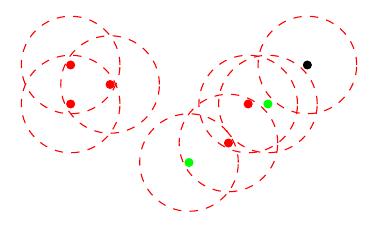![DBSCAN.png](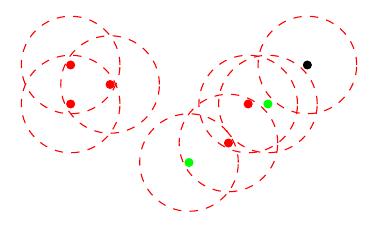![DBSCAN.png](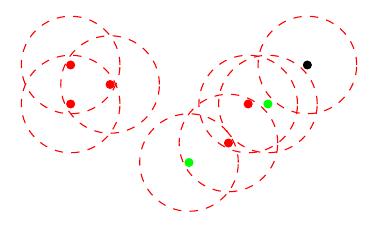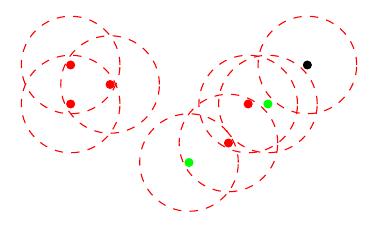)))
 ¿Cuántos humanos somos a tiempo $n$ con respecto a lo que había al principio?

$$ \begin{array}{rcl}        
       h_{n+1}&=&h_{n}-\frac{1}{10}h_n \\
         &=& \bigg(\frac{9}{10}\bigg) h_{n}
   \end{array}$$

También lo podemos expresar en función de los que había inicialmente
     
         
  $$ \begin{array}{rcl}        
       h_{n+1}&=&\bigg(\frac{9}{10}\bigg) h_n = \bigg(\frac{9}{10}\bigg)\bigg(\frac{9}{10}\bigg) h_{n-1} \\
         &=& \bigg(\frac{9}{10}\bigg)^2 h_{n-1} \\
         &=& \dots  \\
         &=& \bigg(\frac{9}{10}\bigg)^{n+1} h_0
   \end{array}$$

 ¿Cómo será el gráfico de la cantidad de humanos en función del tiempo?






In [5]:
import numpy as np
import matplotlib.pyplot as plt

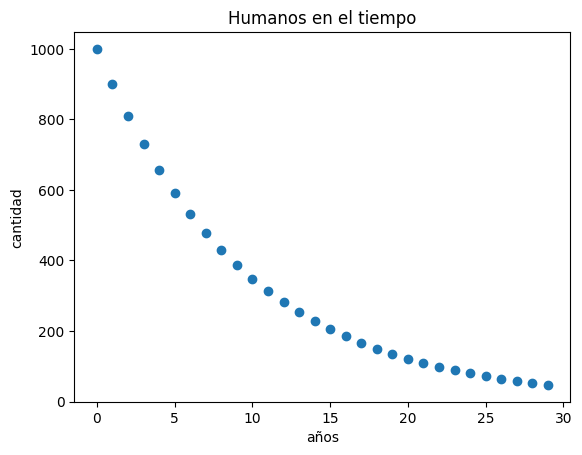

In [6]:
# Definimos a cuántos años queremos ver la evolución
N=30
h= np.zeros(N)
# Vamos a guardar la cantidad de humanos que hay cada año. En principio, tenemos sólo los del primer año.
h[0] = 1000
for i in range(0,N-1):
    h[i+1]=9/10*h[i]
# Graficamos:
plt.plot(h,'o') #grafica circulitos.
plt.xlabel('años')
plt.ylabel('cantidad')
plt.title('Humanos en el tiempo')
plt.show()

Pensemos ahora en la cantidad de zombis que, cada vez que salen los humanos, aumenta (porque los humanos se convierten en zombis). Supongamos que estamos en un caso donde, cada vez que salen los humanos, la cantidad de zombis aumenta en <font color="blue">un décimo</font>:
$$\begin{array}{cccc}
   z_0 & \phantom{aa} & z_1=z_0+\dfrac{z_0}{10} & \dots \\
   t=0 & \phantom{aa} & t=1 & \dots \\
  \end{array}$$
 ¿Cuántos zombis hay a tiempo $n$ con respecto a lo que había al principio? Razonamos como antes:

 $$z_{n+1} = z_n+\frac{1}{10}z_n = \Big(\frac{11}{10}\Big)z_n = \dots = \Big(\frac{11}{10}\Big)^{n+1} z_0 $$

 ¿Cómo sería un gráfico de la cantidad de zombis en función del tiempo?

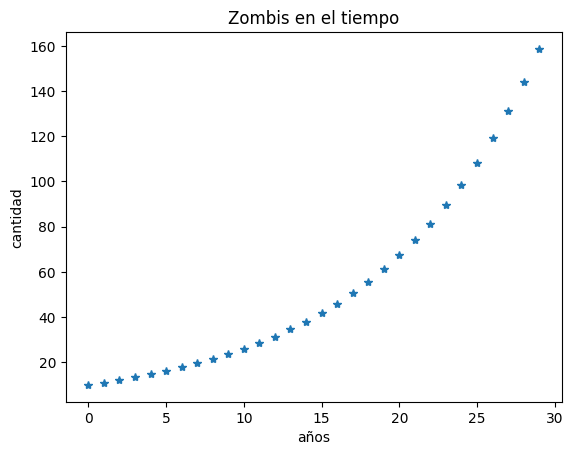

In [7]:
# Definimos a cuántos años queremos ver la evolución
N=30
z= np.zeros(N)
# Vamos a guardar la cantidad de zombis que hay cada año. En principio, tenemos sólo los del primer año.
z[0] = 10
for i in range(0,N-1):
    z[i+1]=(11/10)*z[i]
# Graficamos:
plt.plot(z,'*') #grafica estrellass.
plt.xlabel('años')
plt.ylabel('cantidad')
plt.title('Zombis en el tiempo')
plt.show()

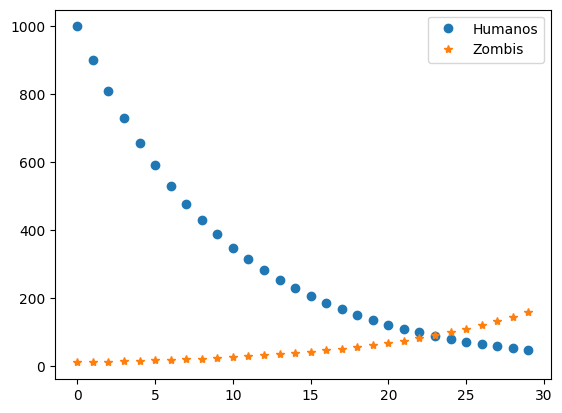

In [8]:
plt.plot(h,'o',label="Humanos")
plt.plot(z,'*',label="Zombis")
plt.legend()
plt.show()

¿Cuántos humanos y cuantos zombis habrá en 15 años según este modelo?


In [9]:
print(h[15],z[15])

205.8911320946491 41.77248169415655


Conclusión, en cada caso tenemos que:
$$h_{n}=\alpha^n h_0, \hspace{2cm} z_{n}=\beta^n z_0.$$
para ciertos valores de $\alpha$ y $\beta$,  

¿Qué podemos deducir un comportamiento cuando el tiempo $n$ se hace cada vez más grande?



<h4>Observar cómo varía el comportamineto dependiendo de los valores de $\alpha$ y $\beta$ <h4>


---



---




<h3>Competencia entre especies</h3>


1.   Pero la cantidad de zombis y la cantidad de humanos dependen una de la otra. Empecemos suponiendo simplemente que la cantidad de zombis aumenta proporcionalmente a la cantidad de humanos. Entonces:
$$\left\lbrace\begin{array}{rcl}h_{k+1} & = & h_k-\alpha z_k \\ z_{k+1} & = & z_k+\beta h_k \end{array}\right.$$

¿Cómo es la evolución de las poblaciones si, por ejemplo, $h_0=1000$, $z_0=10$, $\alpha = 0.1$, $\beta=0.02$?

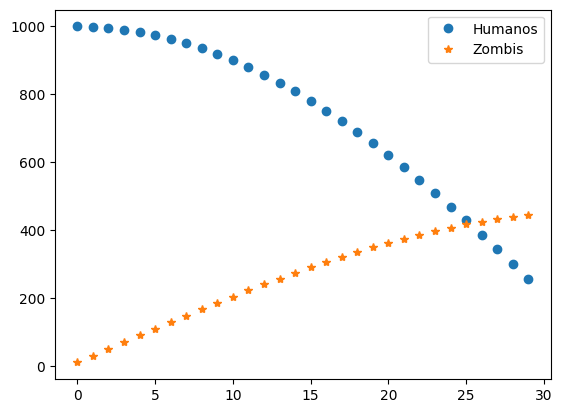

In [10]:
h[0]    = 1000
z[0]    = 10
alfa = 0.1
beta = 0.02
for i in range(0,N-1):
    h[i+1]=h[i]-alfa*z[i];
    z[i+1]=z[i]+beta*h[i];

plt.plot(h,'o')
plt.plot(z,'*')
plt.legend(['Humanos','Zombis'])
# plt.savefig("Humanos_versus_Zombis_M1.jpg")
plt.show()

2.   ¡Tengamos en cuenta la interacción de humanos y zombis y la capacidad de los humanos para defenderse y de los zombis para infectar!

$\alpha=$ efectividad con que los zombis contagian a los humanos.

 $\beta=$ efectividad con que los humanos matan a los zombis.

$$ \begin{array}{rcl}
h_{n+1} & = & h_n - \alpha z_n h_n  \\
z_{n+1} & = &  z_n  - \beta z_n h_n +  \alpha z_n h_n
\end{array} $$

Probamos con $h_0=1000$, $z_0=10$, $\alpha=0.003$ y $\beta=0.001$
<br>¿Qué ocurre con la cantidad total de individuos (humanos + zombis)?
<br>¿Y si se invierten los valores de $\alpha$ y $\beta$?

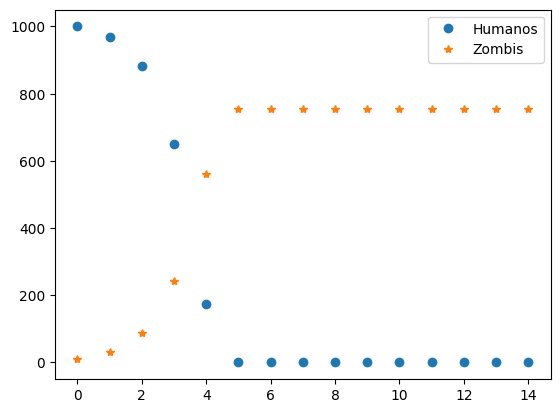

755.8114783547297


In [11]:
M=15
h= np.zeros(M)
z= np.zeros(M)
h[0] = 1000
z[0] = 10
alfa = 0.003
beta = 0.001
for i in range(0,M-1):
    h[i+1] =max(h[i]-alfa*h[i]*z[i],0)
    z[i+1] =max(z[i]+ (alfa -beta)*z[i]*h[i],0);

plt.plot(h,'o')
plt.plot(z,'*')
plt.legend(['Humanos','Zombis'])
plt.show()

print(h[M-1]+z[M-1])



---



---



<h2> Segunda Parte</h2>

3.  Veamos un modelo más complejo. Consideremos lo siguiente:

  *   Los humanos nacemos proporcionalmente a nuestra población (tasa de natalidad TN).
  *   Para que un humano se convierta en zombi, se tiene que encontrar un humano con un zombi, tiene que haber interacción y hay una tasa de efectividad $a$ con la que los zombis logran contagiar a los humanos.
  *   Los humanos morimos por causas ajenas a los zombis proporcionalmente a nuestra población (tasa de mortalidad TM).
  *   Los zombis no se reproducen ni mueren por causas naturales.
  *   Los zombis pueden morir cuando hay encuentro con humanos porque los humanos los matamos con una tasa de efectividad $b$.

Las ecuaciones quedan:
$$\left\lbrace\begin{array}{rcl}h_{n+1} & = & h_n+ TN h_n - TM h_n - a h_n z_n \\
z_{n+1} & = & z_n+a h_n z_n -b h_n z_n \\
\end{array}\right.$$

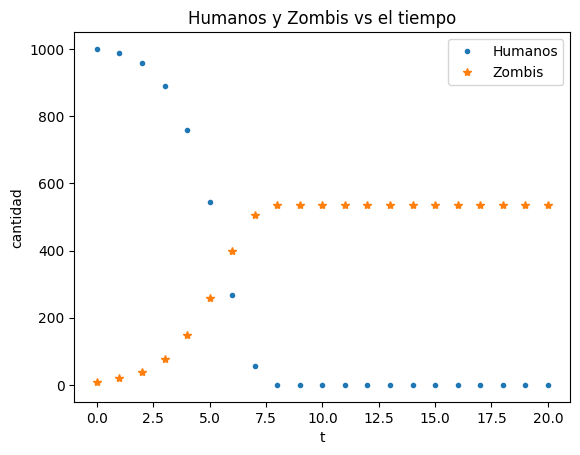

In [12]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

h0 = 1000
z0 = 10
h  = [h0]
z  = [z0]

tiempo_simulacion = 20

for i in range(0,tiempo_simulacion):
    h.append(max(h[i]+(TN-TM)*h[i]-a*h[i]*z[i],0))
    z.append(max(z[i]+(a-b)*h[i]*z[i],0))

plt.plot(h,'.')
plt.plot(z,'*')
plt.title('Humanos y Zombis vs el tiempo')
plt.xlabel('t')
plt.ylabel('cantidad')
plt.legend(['Humanos','Zombis'])
plt.show()

¿Qué ocurre si se modifican los parámetros? Por ejemplo, si se aumenta el valor de $b$ a $0.0015$? ¿y si $b=0.002$? ¿y si $b>a$?

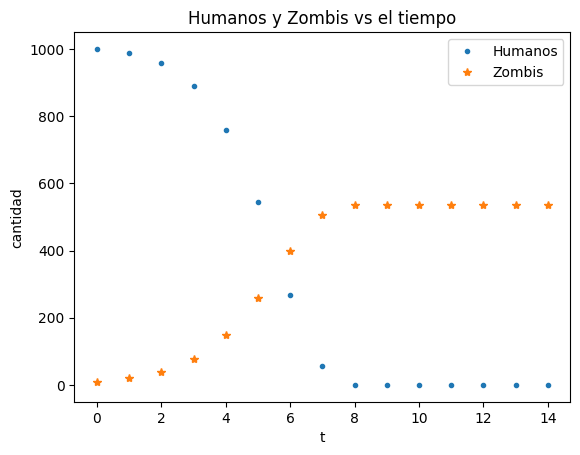

In [13]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

h0 = 1000
z0 = 10
h  = [h0]
z  = [z0]

Tf=15 #Tiempo final
for i in range(0,Tf-1):
    h.append(max(h[i]+(TN-TM)*h[i]-a*h[i]*z[i],0));
    z.append(max(z[i]+(a-b)*h[i]*z[i],0));

plt.plot(h,'.')
plt.plot(z,'*')
plt.title('Humanos y Zombis vs el tiempo')
plt.xlabel('t')
plt.ylabel('cantidad')
plt.legend(['Humanos','Zombis'])
plt.show()

Probemos también qué ocurre si se deja $b=0.001$ pero se disminuye $a$, o se aumenta $TN$ o se disminuye $TM$.

4. Se puede observar una dinámica interesante si contemplamos la posibilidad de que los zombis "mueran" por "causas naturales". En ese caso, las ecuaciones quedan:
$$\left\lbrace\begin{array}{rcl}h_{n+1} & = & h_n+(TN-TM) h_n - a h_n z_n \\
z_{n+1} & = & c z_n+(a-b) h_n z_n \\
\end{array}\right.$$
Donde $c$ es la proporción de zombis que sobrevivirían con independencia de los encuentros con humanos.

Probemos este modelo con $TN = 0.017$, $TM = 0.008$, $a = 0.002$, $b = 0.001$ y $c=0.99$ y con una cantidad más pareja de humanos y zombis.

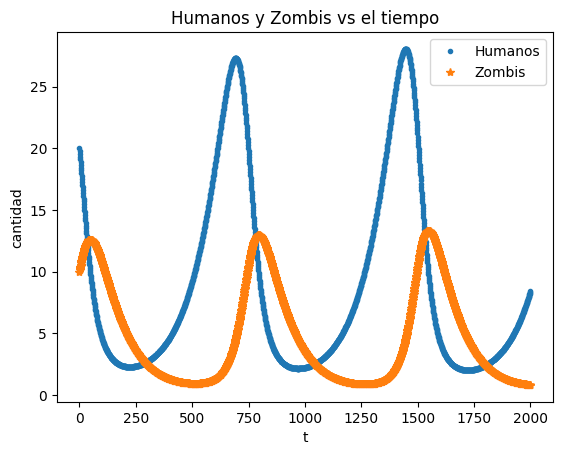

In [14]:
TN = 0.017
TM = 0.008

a = 0.002
b = 0.001

c = 0.99

h0 = 20
z0 = 10
h  = [h0]
z  = [z0]

tiempo_simulacion = 2000

for i in range(0,tiempo_simulacion):
    h.append(h[i]+(TN-TM)*h[i]-a*h[i]*z[i])
    z.append(c*z[i]+(a-b)*h[i]*z[i])

plt.plot(h,'.')
plt.plot(z,'*')
plt.title('Humanos y Zombis vs el tiempo')
plt.xlabel('t')
plt.ylabel('cantidad')
plt.legend(['Humanos','Zombis'])
plt.show()

¿Qué se observa en el gráfico anterior? ¿Qué pasa con la cantidad de zombis y de humanos?

En un caso como este es interesante también realizar el gráfico de las poblaciones una en función de la otra, sin mirar el tiempo. De la siguiente manera:

Text(0, 0.5, 'Zombis')

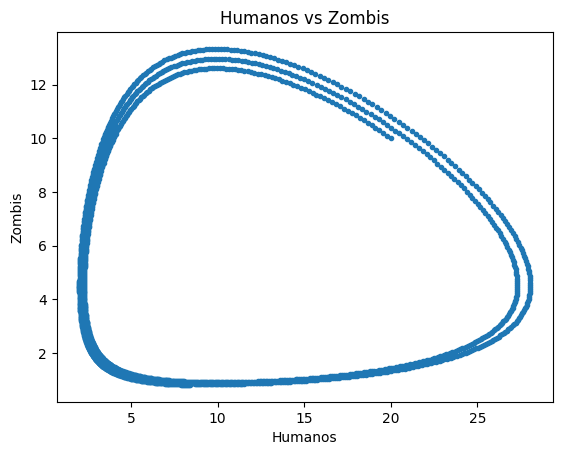

In [15]:
plt.plot(h,z,'.')
plt.title('Humanos vs Zombis')
plt.xlabel('Humanos')
plt.ylabel('Zombis')


¿Qué se puede interpretar de este gráfico?

<h2> Yapa </h2>

Para cerrar la parte de modelado matemático, consideremos el modelo para enfermedades infecciosas $SI$:
$$\left\lbrace\begin{array}{rcl}
S_{n+1} & = & S_n+ TN(S_n+I_n)-m_1 S_n - a S_n I_n + b I_n\\
I_{n+1} & = & I_n - m_2 I_n + a S_n I_n - b I_n\\
\end{array}\right.$$
Consideremos por ejemplo: $TN=0.17$, $m_1 = 0.08$, $a=0.0005$, $b=0.07$, $m_2 = 0.15$, con $S_0=1000$ e $I_0=5$.

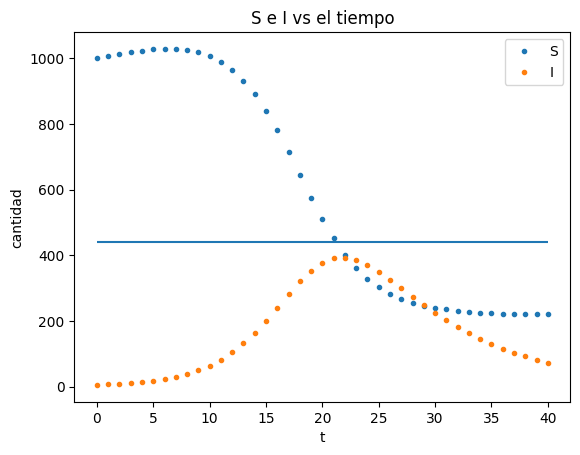

In [16]:
TN  = 0.017
m1 = 0.008

a  = 0.0005
b = 0.07
m2  = 0.15

S0  = 1000
I0  = 5
S   = [S0]
I   = [I0]

tiempo_simulacion  = 40
for i in range(0,tiempo_simulacion):
    S.append(max(S[i]+TN*(S[i]+I[i])-m1*S[i]-a*S[i]*I[i]+b*I[i],0));
    I.append(max(I[i]+a*S[i]*I[i]-m2*I[i]-b*I[i],0));

plt.plot(S,'.')
plt.plot(I,'.')
plt.hlines((b+m2)/a,xmin=0,xmax=40)
plt.title('S e I vs el tiempo')
plt.xlabel('t')
plt.ylabel('cantidad')
plt.legend(['S','I'])
plt.show()

# Agreguemos datos

In [17]:
import pandas as pd

Veamos ahora cómo este modelos de arriba puede ayudarnos a representar situaciones reales. En el archivo datosGRIPE.csv se encuentra el porcentaje de infectados por gripe A durante 33 semanas en cierta región de USA (https://www.cdc.gov/flu/weekly/weeklyarchives2022-2023/data/whoAllregt_cl21.html). ¿Podemos *ajustar* los parámetros del modelo para conseguir la curva que sugieren los datos?

In [20]:
# from google.colab import files
# uploaded = files.upload()

datos = pd.read_csv('datosGRIPE.csv')
datosNP = datos.to_numpy()
# print(datosNP)


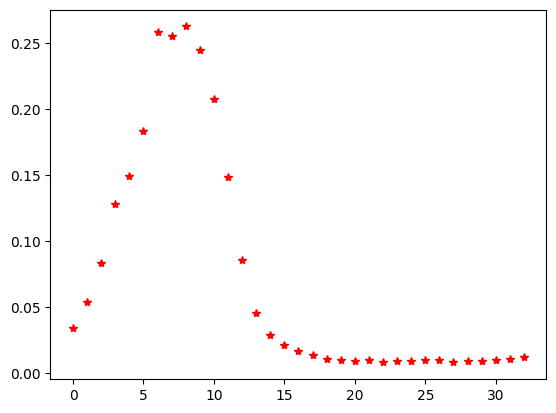

In [21]:
X = np.array(datosNP)
plt.plot(X[:,1],'*r')
plt.show()

Notemos que nuestro modelo se basa en la *cantidad* de individuos, mientras que los datos respresentan una *proporción* de individuos. Para poder comparar, tomemos una población total de $2700$ individuos. Probemos con estos parámetros:

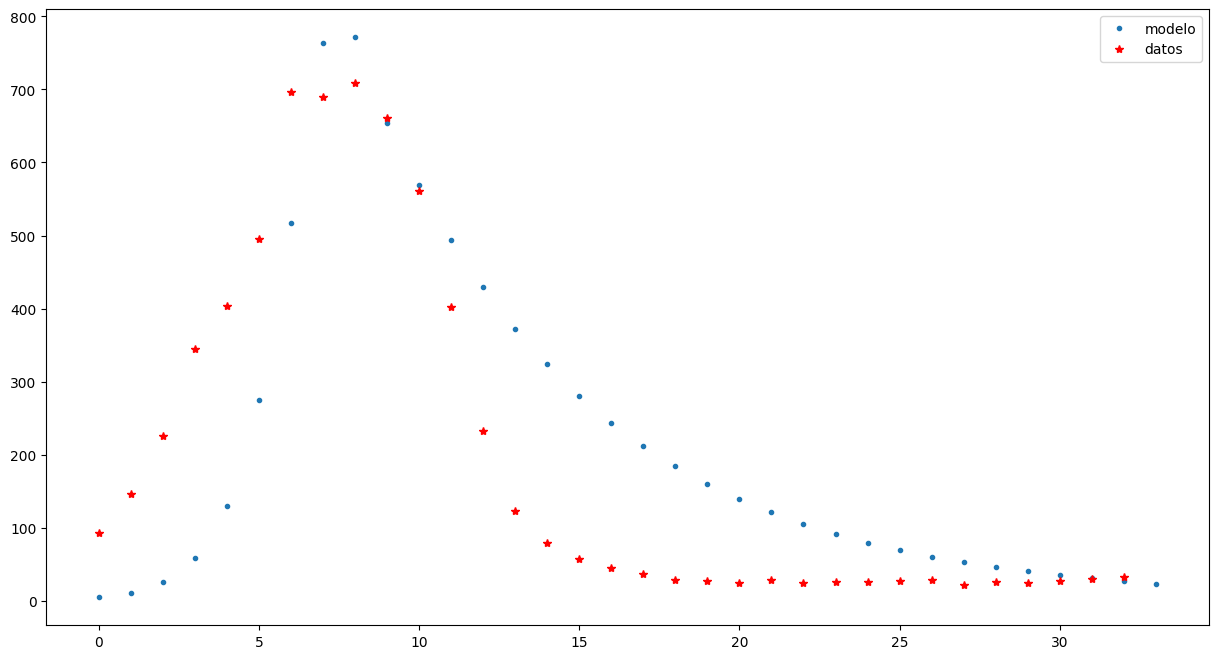

In [31]:
a  = 0.0015
b = 0.08

S0  = 1000
I0  = 5
S   = [S0]
I   = [I0]

tiempo_simulacion  = 33
for i in range(0,tiempo_simulacion):
    S.append(max(S[i]+TN*(S[i]+I[i])-m1*S[i]-a*S[i]*I[i]+b*I[i],0));
    I.append(max(I[i]+a*S[i]*I[i]-m2*I[i]-b*I[i],0));

Infectados_Gripe = 2700*X[:,1]

plt.plot(I,'.',label='modelo')
plt.plot(Infectados_Gripe,'*r',label='datos')
plt.legend()
plt.show()

En el archivo dataCOVID_Italia2020.csv tiene el número de casos positivos por cada semana del año 2020 en Italia (https://www.ecdc.europa.eu/en/publications-data/covid-19-testing). ¿Les parece que se podrá modelar con las mismas ecuaciones?

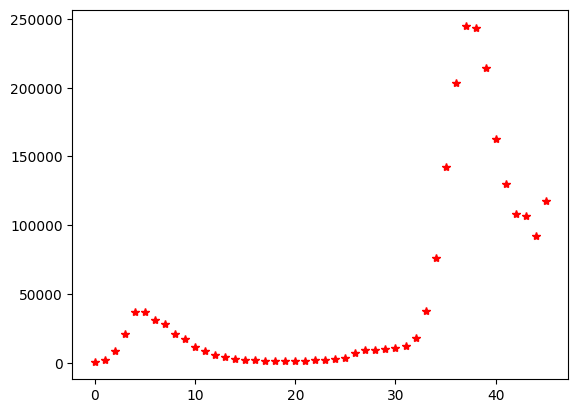

In [23]:
# from google.colab import files
# uploaded = files.upload()

datos = pd.read_csv('dataCOVID_Italia2020.csv')
datosNP = datos.to_numpy()
# print(datosNP[:,6])

Y = np.array(datosNP[:,6])
plt.plot(Y,'*r')
plt.show()

## Cómo distinguir zombis de humanos

Supongamos ahora que los zombis necesitan distinguir de alguna manera a los humanos del resto de los zombis. Para esto, miden la temperatura corporal y la actividad muscular de cada individuo. Sus mediciones los llevaron al siguiente *diagrama de dispersión*:

In [24]:
plt.rcParams["figure.figsize"] = (15,8)

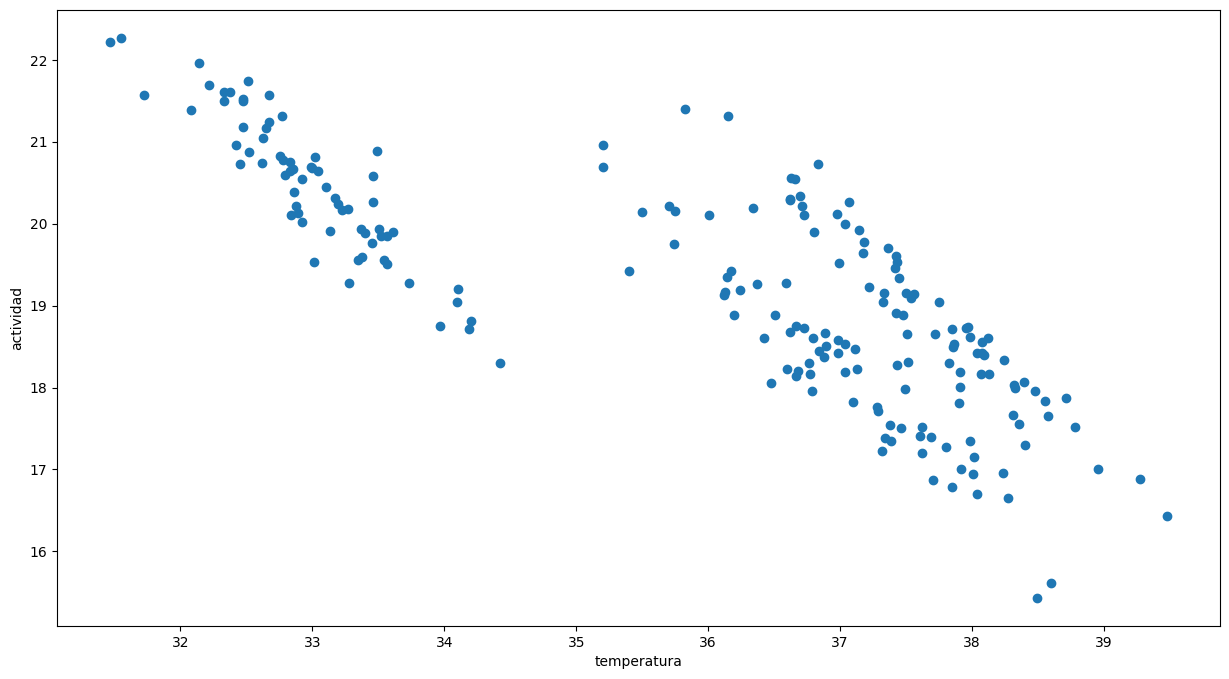

In [27]:
# from google.colab import files
# uploaded = files.upload()

datos = pd.read_csv('datosZombis.csv')
datosNP = datos.to_numpy()
# print(datosNP)

X_zombi = np.array(datosNP)

plt.scatter(X_zombi[:,0],X_zombi[:,1])
# # Para ver a qué individuo corresponde cada punto:
# for label, x, y in zip(np.arange(len(X_zombi[:,0])), X_zombi[:, 0], X_zombi[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(-5, -15), textcoords='offset points')
plt.xlabel('temperatura')
plt.ylabel('actividad')
# plt.ylim([14,23])
plt.show()

Para distinguir a los individuos, utilizan el algoritmo de DBSCAN (Density-based spatial clustering of applications with noise). Se puede ver una visualización interactiva en: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


Para iniciar el agrupamiento necesitamos elegir dos parámetros: `eps` y `min_samples`. Es decir, el radio del disco (`eps`>0) y la cantidad mínima de puntos que debe haber en él (`min_samples`). Y definimos tres tipos de puntos:

1) **Núcleos**: puntos tales que si tomamos un disco de radio `eps` alrededor de ellos, habrá al menos `min_samples` puntos en ese disco (incluyéndolos a ellos mismos).

2) **Puntos alcanzables**: un punto es *directamente alcanzable* si está a distancia menor o igual que `eps` de al menos un núcleo. Un punto es *alcanzable desde un núcleo* si podemos armar un camino de núcleos tal que nuestro punto es directamente alcanzado por el último núcleo.

3) **Ruido**: si no es núcleo ni es alcanzado por ningún núcleo.

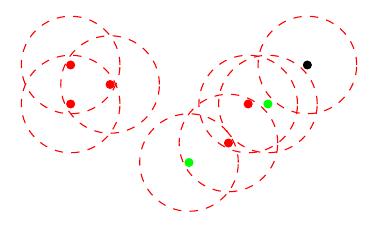

En esta imagen se consideró `min_samples=3`. Los puntos <font color=red> núcleo </font> están en  <font color=red> rojo </font>, los <font color=green> puntos alcanzables </font> están en <font color=green> verde </font> y los puntos ruido están en negro.

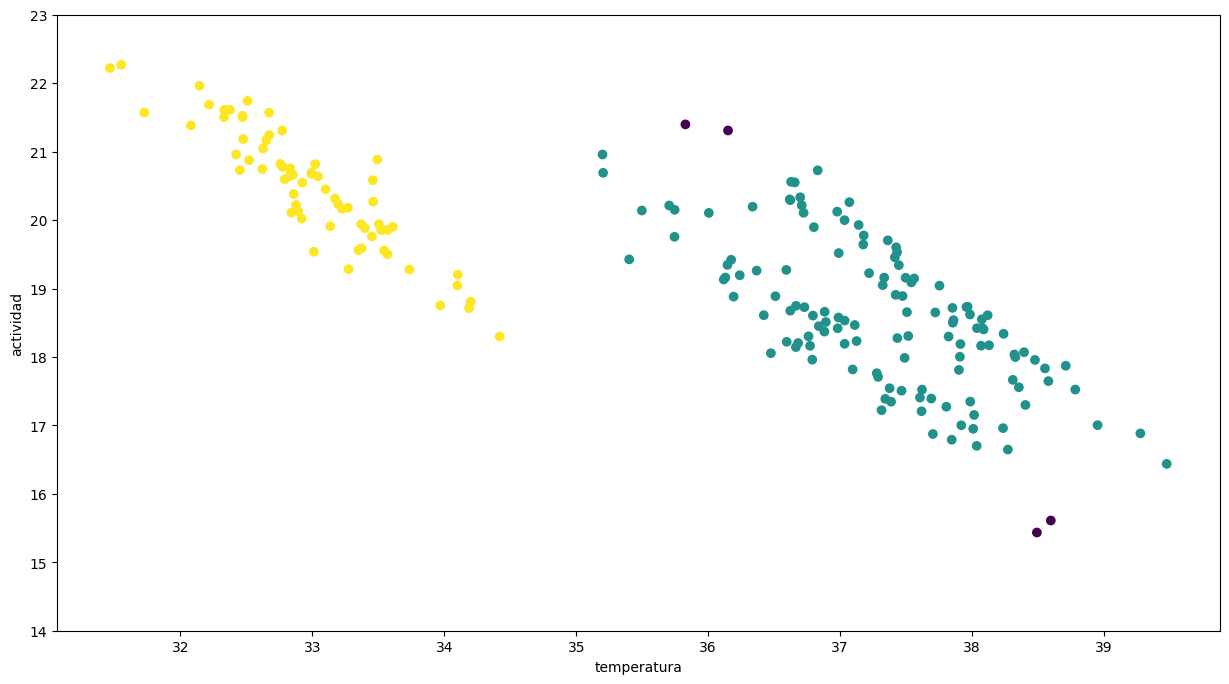

In [30]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.8, min_samples=5)

grupos = db.fit_predict(X_zombi)

plt.scatter(X_zombi[:,0], X_zombi[:,1], c = grupos)
# # Para ver a qué individuo corresponde cada punto:
# for label, x, y in zip(np.arange(len(X_zombi[:,0])), X_zombi[:, 0], X_zombi[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(-5, -15), textcoords='offset points')
plt.xlabel('temperatura')
plt.ylabel('actividad')
plt.ylim([14,23])
plt.show()

Ahora supongamos que al medir la temperatura corporal y la actividad muscular de cada individuo llegar al siguiente *diagrama de dispersión*:

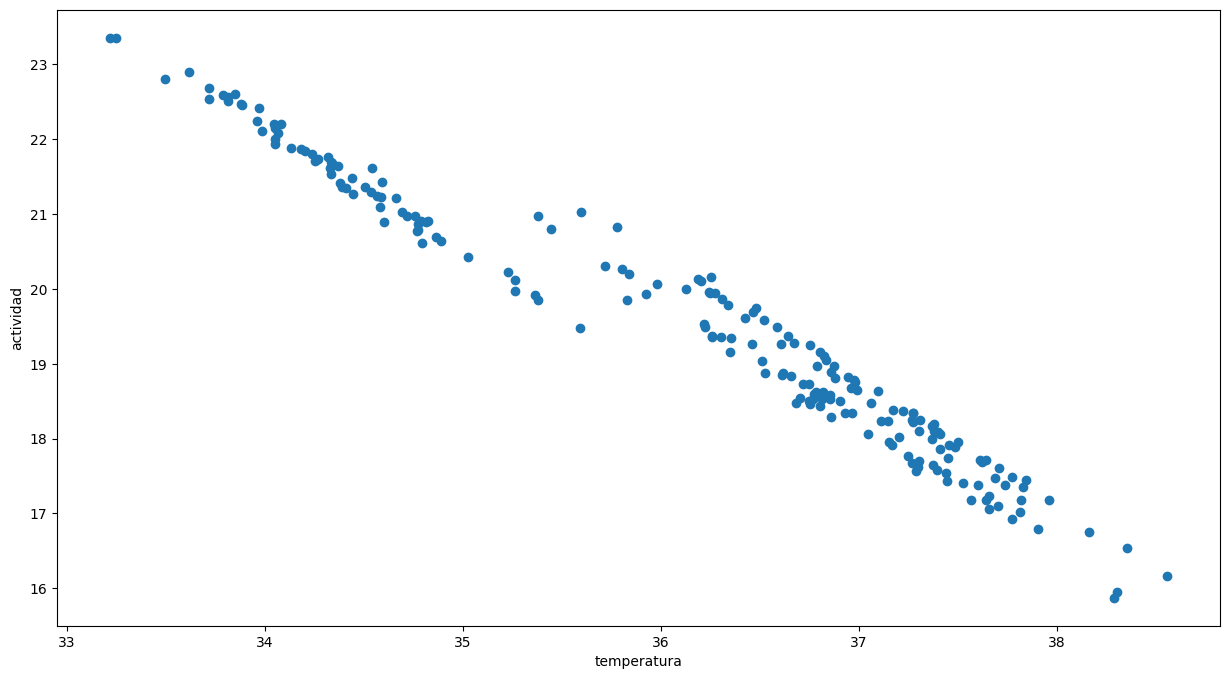

In [29]:
# from google.colab import files
# uploaded = files.upload()


datos2 = pd.read_csv('datosZombis2.csv')
datosNP2 = datos2.to_numpy()
# print(datosNP2)

X_zombi2 = np.array(datosNP2)

plt.scatter(X_zombi2[:,0],X_zombi2[:,1])
# # Para ver a qué individuo corresponde cada punto:
# for label, x, y in zip(np.arange(len(X_zombi2[:,0])), X_zombi2[:, 0], X_zombi2[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(-5, -15), textcoords='offset points')
plt.xlabel('temperatura')
plt.ylabel('actividad')
# plt.ylim([14,23])
plt.show()

¿Podemos conseguir dos grupos (humanos/zombis) usando el algoritmo de DBSCAN? ¿Qué sucede?